In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('../artifacts/data_ingestion/AmesHousing.csv')
df=df.drop(['Order','PID','MS SubClass','Fence','Fireplace Qu','Mas Vnr Type','Alley','Pool QC','Misc Feature'],axis=1)
df

,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,0,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,RL,37.0,7937,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,...,0,0,0,0,0,3,2006,WD,Normal,142500
2926,RL,NaN,8885,Pave,IR1,Low,AllPub,Inside,Mod,Mitchel,...,0,0,0,0,0,6,2006,WD,Normal,131000
2927,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,...,0,0,0,0,700,7,2006,WD,Normal,132000
2928,RL,77.0,10010,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,...,0,0,0,0,0,4,2006,WD,Normal,170000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 73 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MS Zoning        2930 non-null   object 
 1   Lot Frontage     2440 non-null   float64
 2   Lot Area         2930 non-null   int64  
 3   Street           2930 non-null   object 
 4   Lot Shape        2930 non-null   object 
 5   Land Contour     2930 non-null   object 
 6   Utilities        2930 non-null   object 
 7   Lot Config       2930 non-null   object 
 8   Land Slope       2930 non-null   object 
 9   Neighborhood     2930 non-null   object 
 10  Condition 1      2930 non-null   object 
 11  Condition 2      2930 non-null   object 
 12  Bldg Type        2930 non-null   object 
 13  House Style      2930 non-null   object 
 14  Overall Qual     2930 non-null   int64  
 15  Overall Cond     2930 non-null   int64  
 16  Year Built       2930 non-null   int64  
 17  Year Remod/Add

In [4]:
df.isna().sum()

MS Zoning           0
Lot Frontage      490
Lot Area            0
Street              0
Lot Shape           0
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 73, dtype: int64

In [5]:
df

,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,0,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,RL,37.0,7937,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,...,0,0,0,0,0,3,2006,WD,Normal,142500
2926,RL,NaN,8885,Pave,IR1,Low,AllPub,Inside,Mod,Mitchel,...,0,0,0,0,0,6,2006,WD,Normal,131000
2927,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,...,0,0,0,0,700,7,2006,WD,Normal,132000
2928,RL,77.0,10010,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,...,0,0,0,0,0,4,2006,WD,Normal,170000


In [6]:
threshold = 0.5
df = df.dropna(thresh=int((1 - threshold) * df.shape[1]))
df

,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,RL,141.0,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,0,0,0,0,0,5,2010,WD,Normal,215000
1,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,RL,93.0,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,0,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,RL,37.0,7937,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,...,0,0,0,0,0,3,2006,WD,Normal,142500
2926,RL,NaN,8885,Pave,IR1,Low,AllPub,Inside,Mod,Mitchel,...,0,0,0,0,0,6,2006,WD,Normal,131000
2927,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,...,0,0,0,0,700,7,2006,WD,Normal,132000
2928,RL,77.0,10010,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,...,0,0,0,0,0,4,2006,WD,Normal,170000


In [7]:
numeric_columns = df.select_dtypes(include=['number']).columns
string_columns = df.select_dtypes(include=['object']).columns


In [8]:
string_columns,len(string_columns)

(Index(['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
        'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
        'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
        'Exterior 1st', 'Exterior 2nd', 'Exter Qual', 'Exter Cond',
        'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
        'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
        'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
        'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond',
        'Paved Drive', 'Sale Type', 'Sale Condition'],
       dtype='object'),
 37)

In [9]:
numeric_columns,len(numeric_columns)

(Index(['Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond',
        'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1',
        'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF',
        '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
        'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
        'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt',
        'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF',
        'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val',
        'Mo Sold', 'Yr Sold', 'SalePrice'],
       dtype='object'),
 36)

In [10]:
num_imputer = SimpleImputer(strategy='mean') 
df[numeric_columns] = num_imputer.fit_transform(df[numeric_columns])

# for col in numeric_columns:
#     num_imputer = SimpleImputer(strategy='mean') 
#     df[col] = num_imputer.fit_transform(df[col])

In [11]:
df

,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,RL,141.00000,31770.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,0.0,0.0,0.0,0.0,0.0,5.0,2010.0,WD,Normal,215000.0
1,RH,80.00000,11622.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,0.0,0.0,120.0,0.0,0.0,6.0,2010.0,WD,Normal,105000.0
2,RL,81.00000,14267.0,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,...,0.0,0.0,0.0,0.0,12500.0,6.0,2010.0,WD,Normal,172000.0
3,RL,93.00000,11160.0,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,...,0.0,0.0,0.0,0.0,0.0,4.0,2010.0,WD,Normal,244000.0
4,RL,74.00000,13830.0,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,...,0.0,0.0,0.0,0.0,0.0,3.0,2010.0,WD,Normal,189900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,RL,37.00000,7937.0,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,...,0.0,0.0,0.0,0.0,0.0,3.0,2006.0,WD,Normal,142500.0
2926,RL,69.22459,8885.0,Pave,IR1,Low,AllPub,Inside,Mod,Mitchel,...,0.0,0.0,0.0,0.0,0.0,6.0,2006.0,WD,Normal,131000.0
2927,RL,62.00000,10441.0,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,...,0.0,0.0,0.0,0.0,700.0,7.0,2006.0,WD,Normal,132000.0
2928,RL,77.00000,10010.0,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,...,0.0,0.0,0.0,0.0,0.0,4.0,2006.0,WD,Normal,170000.0


In [12]:
def histogram_analyze(df: pd.DataFrame, feature: str):
        plt.figure(figsize=(10, 6))
        sns.histplot(df[feature], kde=True, bins=30)
        plt.title(f"Distribution of {feature}")
        plt.xlabel(feature)
        plt.ylabel("Frequency")
        plt.show()

def scatter_analyze(df: pd.DataFrame, feature1: str, feature2: str):
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=feature1, y=feature2, data=df)
        plt.title(f"{feature1} vs {feature2}")
        plt.xlabel(feature1)
        plt.ylabel(feature2)
        plt.xticks(rotation=45)
        plt.show()

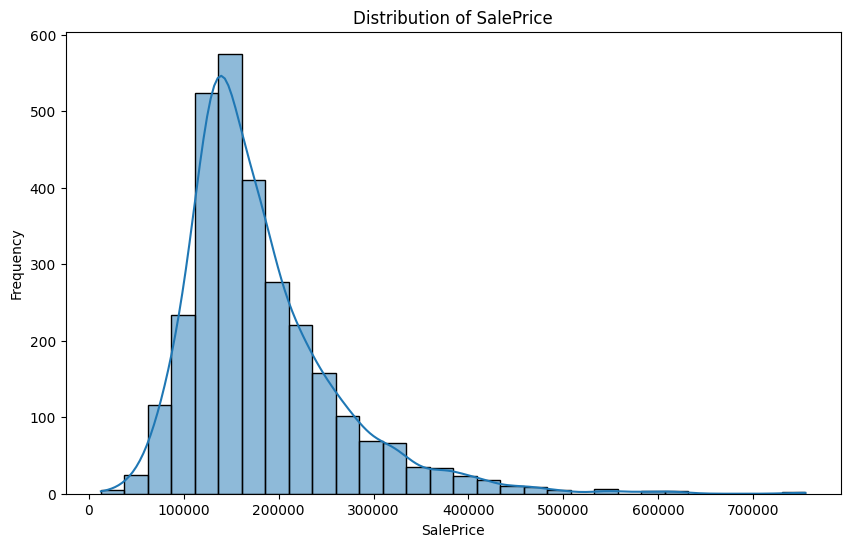

In [13]:
histogram_analyze(df,'SalePrice')

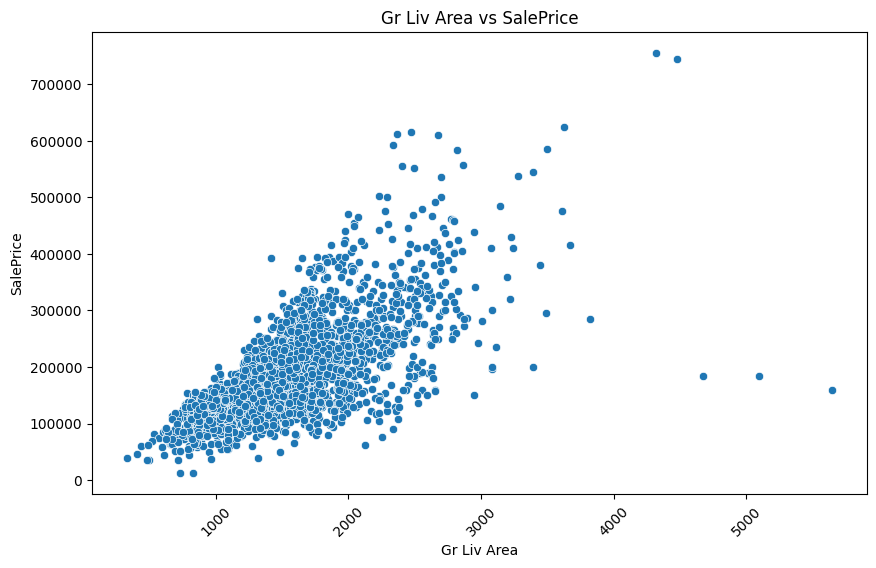

In [14]:
scatter_analyze(df,'Gr Liv Area', 'SalePrice')

In [15]:
def generate_correlation_heatmap(df: pd.DataFrame):
        plt.figure(figsize=(12, 10))
        sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
        plt.title("Correlation Heatmap")
        plt.show()

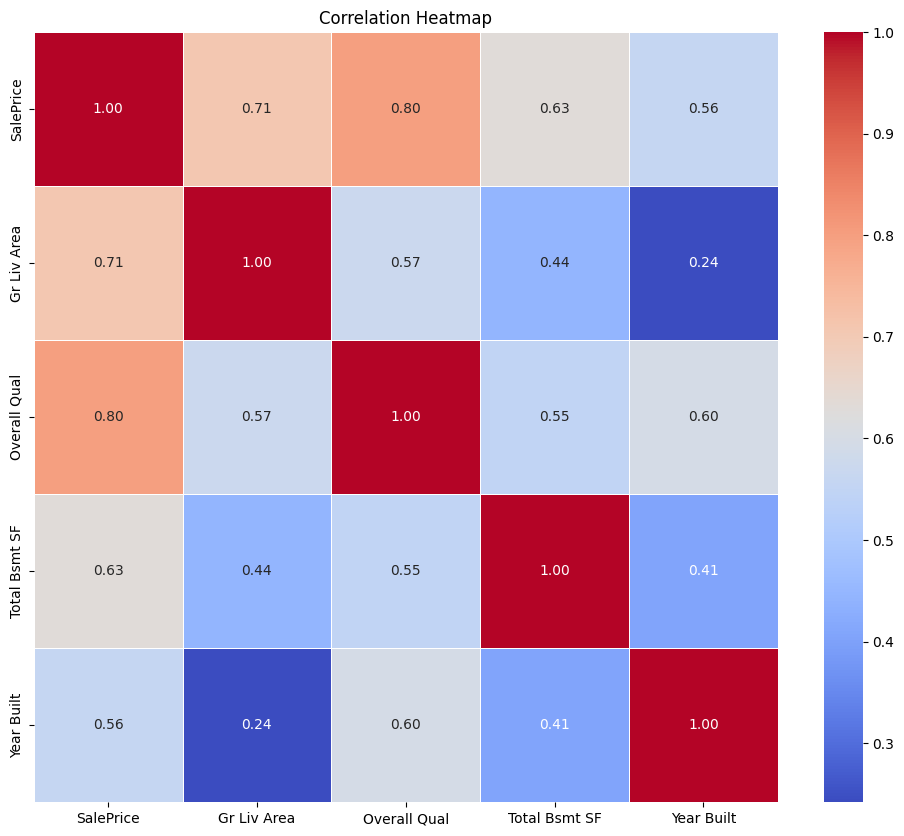

In [16]:
cols=['SalePrice', 'Gr Liv Area', 'Overall Qual', 'Total Bsmt SF', 'Year Built']
generate_correlation_heatmap(df[cols])

In [17]:
def  box_analyze(df: pd.DataFrame, feature1: str, feature2: str):
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=feature1, y=feature2, data=df)
        plt.title(f"{feature1} vs {feature2}")
        plt.xlabel(feature1)
        plt.ylabel(feature2)
        plt.xticks(rotation=45)
        plt.show()

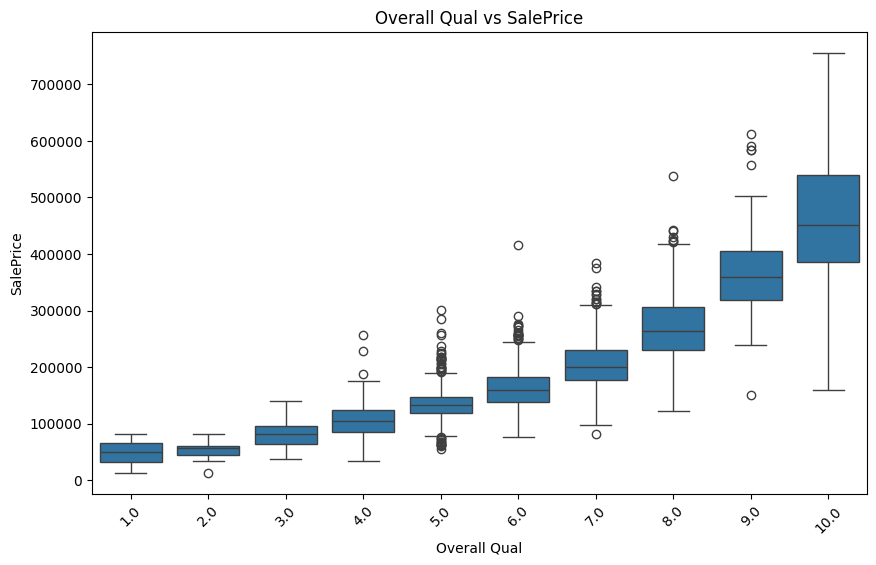

In [18]:
box_analyze(df,'Overall Qual', 'SalePrice')

In [19]:
missing_columns = df.isnull().sum()[df.isnull().sum() > 0]
missing_columns

Bsmt Qual          80
Bsmt Cond          80
Bsmt Exposure      83
BsmtFin Type 1     80
BsmtFin Type 2     81
Electrical          1
Garage Type       157
Garage Finish     159
Garage Qual       159
Garage Cond       159
dtype: int64

In [20]:
string_columns

Index(['MS Zoning', 'Street', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Exter Qual', 'Exter Cond',
       'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin Type 2', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Kitchen Qual', 'Functional',
       'Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond',
       'Paved Drive', 'Sale Type', 'Sale Condition'],
      dtype='object')

In [21]:
df.shape

(2930, 73)

In [22]:
df.dropna(inplace=True)

In [23]:
df.shape

(2700, 73)

In [24]:
df['MS Zoning'].value_counts()

MS Zoning
RL         2127
RM          398
FV          138
RH           21
C (all)      15
I (all)       1
Name: count, dtype: int64

In [25]:
df['Street'].value_counts()

Street
Pave    2691
Grvl       9
Name: count, dtype: int64

In [26]:
df['Kitchen Qual'].value_counts()

Kitchen Qual
TA    1326
Gd    1126
Ex     201
Fa      46
Po       1
Name: count, dtype: int64

In [27]:
label_encoder = LabelEncoder()

for col in string_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [28]:
df

,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,4,141.00000,31770.0,1,0,3,0,0,0,15,...,0.0,0.0,0.0,0.0,0.0,5.0,2010.0,9,4,215000.0
1,3,80.00000,11622.0,1,3,3,0,4,0,15,...,0.0,0.0,120.0,0.0,0.0,6.0,2010.0,9,4,105000.0
2,4,81.00000,14267.0,1,0,3,0,0,0,15,...,0.0,0.0,0.0,0.0,12500.0,6.0,2010.0,9,4,172000.0
3,4,93.00000,11160.0,1,3,3,0,0,0,15,...,0.0,0.0,0.0,0.0,0.0,4.0,2010.0,9,4,244000.0
4,4,74.00000,13830.0,1,0,3,0,4,0,8,...,0.0,0.0,0.0,0.0,0.0,3.0,2010.0,9,4,189900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2924,4,160.00000,20000.0,1,3,3,0,4,0,14,...,0.0,0.0,0.0,0.0,0.0,9.0,2006.0,9,0,131000.0
2925,4,37.00000,7937.0,1,0,3,0,1,0,14,...,0.0,0.0,0.0,0.0,0.0,3.0,2006.0,9,4,142500.0
2926,4,69.22459,8885.0,1,0,2,0,4,1,14,...,0.0,0.0,0.0,0.0,0.0,6.0,2006.0,9,4,131000.0
2928,4,77.00000,10010.0,1,3,3,0,4,1,14,...,0.0,0.0,0.0,0.0,0.0,4.0,2006.0,9,4,170000.0


In [29]:
numeric_columns

Index(['Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond',
       'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1',
       'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt',
       'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF',
       'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val',
       'Mo Sold', 'Yr Sold', 'SalePrice'],
      dtype='object')

In [31]:
import os
os.chdir('../')

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from src.utils.utlis import evaluate_model

In [33]:
models = {
                "Random Forest": RandomForestRegressor(),
                "Linear": LinearRegression(),
                "SVR": SVR()
            }

In [48]:
params = {
    'RandomForestRegressor': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'criterion': ['squared_error', 'absolute_error', 'friedman_mse']  # Valid options
    },
    "SVR": {
        'C': [1, 10],  # Regularization parameter (fewer values to test)
        'kernel': ['rbf'],  # Focus only on radial basis function kernel (common and effective)
        'gamma': ['scale'],  # Use the 'scale' option for gamma (default and efficient)
        'epsilon': [0.1],  # A moderate epsilon value to avoid overfitting
    },
    "LinearRegression": {
        'fit_intercept': [True],  # Typically True for better performance in most cases
    }
}

In [49]:
X=df.drop('SalePrice',axis=1)
y=df['SalePrice']

X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=.2)
X_train.shape,X_test.shape

((2160, 72), (540, 72))

In [50]:
X_test

,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,...,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition
837,4,65.00000,15426.0,1,0,3,0,4,0,5,...,99.0,0.0,0.0,0.0,0.0,0.0,8.0,2009.0,9,4
2748,4,80.00000,9554.0,1,0,3,0,4,0,23,...,81.0,0.0,0.0,0.0,0.0,0.0,9.0,2006.0,9,4
793,4,62.00000,7440.0,1,3,3,0,4,0,7,...,0.0,0.0,0.0,0.0,0.0,0.0,9.0,2009.0,9,4
1890,4,80.00000,8800.0,1,3,3,0,4,0,15,...,0.0,0.0,0.0,0.0,0.0,0.0,10.0,2007.0,1,4
2523,4,79.00000,13110.0,1,0,3,0,0,0,17,...,153.0,0.0,0.0,0.0,0.0,0.0,7.0,2006.0,9,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824,4,77.00000,11422.0,1,0,3,0,4,0,5,...,222.0,0.0,0.0,0.0,0.0,0.0,4.0,2009.0,9,4
1716,4,34.00000,3901.0,1,3,3,0,4,0,19,...,50.0,0.0,0.0,0.0,0.0,0.0,8.0,2007.0,6,5
1877,4,69.22459,9503.0,1,3,3,0,4,0,15,...,28.0,0.0,0.0,0.0,0.0,0.0,6.0,2007.0,9,4
2566,4,69.22459,12700.0,1,0,3,0,4,0,15,...,69.0,0.0,0.0,0.0,0.0,0.0,11.0,2006.0,9,4


In [51]:
model_report = evaluate_model(models, X_train, X_test, y_train, y_test, params)
print(model_report)
print('\n====================================================================================\n')


/Users/akashmukherjee/Programming/Practise ML/House_price_prediction/my_env/lib/python3.11/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 1 is smaller than n_iter=100. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/Users/akashmukherjee/Programming/Practise ML/House_price_prediction/my_env/lib/python3.11/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 1 is smaller than n_iter=100. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/Users/akashmukherjee/Programming/Practise ML/House_price_prediction/my_env/lib/python3.11/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 2 is smaller than n_iter=100. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'Random Forest': 0.8874239805545544, 'Linear': 0.8116122732346663, 'SVR': -0.0865784798103999}




In [53]:
best_model_score = max(model_report.values())
best_model_name = [name for name, score in model_report.items() if score == best_model_score][0]
best_model = models[best_model_name]
best_model

RandomForestRegressor()

In [54]:
best_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}